In [1]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
# load the dataset
df=pd.read_csv('data.csv')
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [3]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
# checking for zeros in columns
zeros_in_columns=(df==0).sum()
zeros_in_columns

date                0
price              49
bedrooms            2
bathrooms           2
sqft_living         0
sqft_lot            0
floors              0
waterfront       4567
view             4140
condition           0
sqft_above          0
sqft_basement    2745
yr_built            0
yr_renovated     2735
street              0
city                0
statezip            0
country             0
dtype: int64

In [6]:
# replace the zeros in price column with the mean
df['price'].replace(0, df['price'].mean(), inplace=True)

C:\Users\Aboh Ssolomon\AppData\Local\Temp\ipykernel_1784\373404907.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].replace(0, df['price'].mean(), inplace=True)


In [7]:
df.select_dtypes(include='number')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0


In [8]:
# replace the zeros in sqft_basement column with the mean
df['sqft_basement'].replace(0, df['sqft_basement'].mean(), inplace=True)

C:\Users\Aboh Ssolomon\AppData\Local\Temp\ipykernel_1784\2741646572.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sqft_basement'].replace(0, df['sqft_basement'].mean(), inplace=True)


In [9]:
df.select_dtypes(include='object')

,date,street,city,statezip,country
0,2014-05-02 00:00:00,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...
4595,2014-07-09 00:00:00,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,5148 S Creston St,Seattle,WA 98178,USA


In [10]:
# Drop 'street' and 'country' columns
df = df.drop(columns=['street', 'country','view','waterfront','date'])

# Check new shape and columns
print(df.shape)
print(df.columns)

(4600, 13)
Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'city', 'statezip'],
      dtype='object')


In [11]:
# Separate features and target
target = "price"   # change this if your label column has another name
X = df.drop(columns=[target])
y = df[target]

In [12]:
# ---: Split categorical into OHE vs Label -----
cat_cols = X.select_dtypes(include="object").columns

# Example rule: <=10 unique values → OHE, else LabelEncode
low_card_cols = [c for c in cat_cols if X[c].nunique() <= 10]
high_card_cols = [c for c in cat_cols if X[c].nunique() > 10]

print("OHE columns:", low_card_cols)
print("LabelEncode columns:", high_card_cols)


OHE columns: []
LabelEncode columns: ['city', 'statezip']


In [13]:
# one hot encoding is empthy so we 
# Apply Label Encoding for high-cardinality columns
for col in high_card_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])


In [14]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,3.130000e+05,3.0,1.50,1340,7912,1.5,3,1340,312.081522,1955,2005,Shoreline,WA 98133
1,2.384000e+06,5.0,2.50,3650,9050,2.0,5,3370,280.000000,1921,0,Seattle,WA 98119
2,3.420000e+05,3.0,2.00,1930,11947,1.0,4,1930,312.081522,1966,0,Kent,WA 98042
3,4.200000e+05,3.0,2.25,2000,8030,1.0,4,1000,1000.000000,1963,0,Bellevue,WA 98008
4,5.500000e+05,4.0,2.50,1940,10500,1.0,4,1140,800.000000,1976,1992,Redmond,WA 98052
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,4,1510,312.081522,1954,1979,Seattle,WA 98133
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,3,1460,312.081522,1983,2009,Bellevue,WA 98007
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,3,3010,312.081522,2009,0,Renton,WA 98059
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,3,1070,1020.000000,1974,0,Seattle,WA 98178


In [15]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,3.0,1.50,1340,7912,1.5,3,1340,312.081522,1955,2005,36,62
1,5.0,2.50,3650,9050,2.0,5,3370,280.000000,1921,0,35,58
2,3.0,2.00,1930,11947,1.0,4,1930,312.081522,1966,0,18,26
3,3.0,2.25,2000,8030,1.0,4,1000,1000.000000,1963,0,3,7
4,4.0,2.50,1940,10500,1.0,4,1140,800.000000,1976,1992,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,6360,1.0,4,1510,312.081522,1954,1979,35,62
4596,3.0,2.50,1460,7573,2.0,3,1460,312.081522,1983,2009,3,6
4597,3.0,2.50,3010,7014,2.0,3,3010,312.081522,2009,0,32,37
4598,4.0,2.00,2090,6630,1.0,3,1070,1020.000000,1974,0,35,71


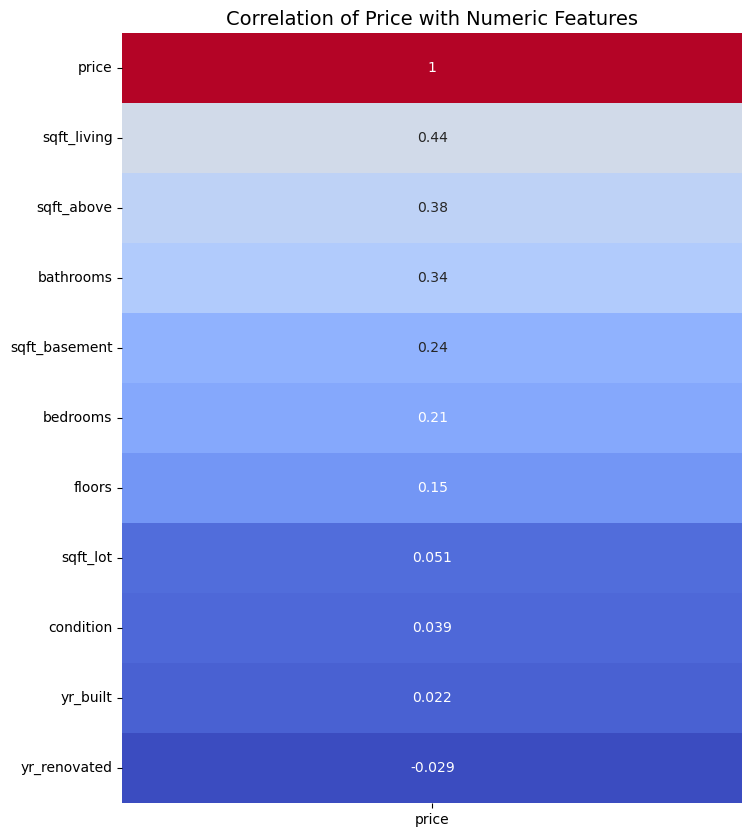

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric features
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation with price
price_corr = numeric_df.corr()['price'].sort_values(ascending=False)

# Plot heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(price_corr.to_frame(), 
            annot=True, 
            cmap="coolwarm", 
            cbar=False)

plt.title("Correlation of Price with Numeric Features", fontsize=14)
plt.show()


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale the available columns
cols_to_scale = ['price']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

print(df[cols_to_scale].head())


      price
0 -0.436551
1  3.256013
2 -0.384844
3 -0.245771
4 -0.013983


In [18]:
# -: Train-test split -----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Final Train shape:", X_train.shape)
print("Final Test shape :", X_test.shape)

Final Train shape: (3680, 12)
Final Test shape : (920, 12)


In [19]:
# Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
import numpy as np


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor




# ------------------------------
# 2. Initialize Models
# ------------------------------
models = {
    "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=300, learning_rate=0.1, random_state=42),
    "LightGBM": lgb.LGBMRegressor(n_estimators=300, learning_rate=0.1, random_state=42),
    "CatBoost": CatBoostRegressor(iterations=300, learning_rate=0.1, verbose=0, random_state=42)
}

# ------------------------------
# 3. Train & Evaluate
# ------------------------------
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "R2": r2}

# ------------------------------
# 4. Show Results
# ------------------------------
results_df = pd.DataFrame(results).T
print(results_df)



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1243
[LightGBM] [Info] Number of data points in the train set: 3680, number of used features: 12
[LightGBM] [Info] Start training from score 550847.866627
                        MAE           RMSE        R2
RandomForest  163430.712036  985357.681881  0.044858
XGBoost       147201.048566  975560.427624  0.063757
LightGBM      152184.418322  978140.571387  0.058799
CatBoost      151712.610542  977007.849993  0.060977


In [20]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "n_estimators": [200, 500, 1000],
    "max_depth": [5, 10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
grid = RandomizedSearchCV(rf, param_grid, n_iter=10, cv=3, scoring="r2", n_jobs=-1)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best R²:", grid.best_score_)


Best params: {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': None}
Best R²: 0.6152703519842512


In [21]:
y_test_pred=grid.predict(X_test)

In [22]:
 d=pd.DataFrame({'actual':y_test,'predicted': y_test_pred,'difference':y_test-y_test_pred})
d

,actual,predicted,difference
3683,5.440000e+05,457020.948338,8.697905e+04
4411,5.519630e+05,379412.721222,1.725503e+05
2584,1.712500e+06,916270.262688,7.962297e+05
69,3.650000e+05,413708.325127,-4.870833e+04
1844,2.750000e+05,264784.286087,1.021571e+04
...,...,...,...
1612,7.500000e+05,554930.270153,1.950697e+05
1068,2.300000e+05,550140.664136,-3.201407e+05
4350,2.659000e+07,258380.169117,2.633162e+07
3027,6.870000e+05,727640.778856,-4.064078e+04


In [23]:
# save the grid searchCV OF 
import joblib
joblib.dump(grid,'grid.pkl')

['grid.pkl']

In [24]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'city', 'statezip'],
      dtype='object')